#  QIS: Lab 1: Deutsh-Josza Algorithm
Team members: 
- Viviana Cadena
- Jesus Lopez
- Jorge Ortega
- Denisse Loya


## Objective:
- Implement the Deutsch-Jozsa Algorithm using Qiskit.
- Execute the Algorithm on IBM Quantum Hardware
- Interpret and analyze the measurement Results.

## Getting Started

### Installation of Qiskit

In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit_serverless
!pip install pylatexenc
!pip install qiskit_aer
import qiskit_aer
from qiskit_aer import Aer

zsh:1: no matches found: qiskit[visualization]


Testing that the library is working correctly

In [1]:
import qiskit
print(qiskit.__version__)

1.3.2


Initializing with our personal token for the IBM quantum computer

In [32]:
service = QiskitRuntimeService(channel="ibm_quantum",
                               token='')

In [33]:
backend = service.backend(name='ibm_kyiv')
print("Number of qubits", backend.num_qubits)

Number of qubits 127


### imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

## Description of the Algorithm
- We start with state |0, 1> = |0i> ⊗ |1>
- we apply the Hadamard transformation H to both bits
- then, we apply f;
- after that, we again apply the Hadamard transformation to both bits;
- finally, we measure the first bit of the resulting 2-bit state:
    - if the first bit is 0, we conclude that the function f is constant;
    - if the first bit is 1, we conclude that the function f is not constant.

## Oracle (Black box)
In this algorithm there is a blackbox, which in the description of the algorithm we defined as f(x), the results depends on what is f(x) and helps determine whether the given function is constant or balanced.

We can say a given function is:
- **Constant** if f(x) returns the same value for all inputs.
- **Balanced** if f(x) return 0 for half of the inputs and 1 for the other half.

In [35]:
# This function chooses a type of oracle at randomly with a 
# probability half that the oracle will be balanced or constant.
def oracle(qc, n):
    oracleType = np.random.randint(2)
    oracleValue = np.random.randint(2)
    # If the type is 0 then it will be either a 0 or 1.
    if oracleType == 0:
        print("The oracle is constant: ", oracleValue)
        if oracleValue == 1:
            qc.x(n)
    else:
        # Select a random qubit to control the output
        bit_pattern = np.random.randint(1,2**n)
        print("The oracle is balanced.")
        # Apply the CNOT for each of the qubits that has a 1 in the pattern
        for i in range(n):
            if bit_pattern & (1 << i):
                qc.cx(i, n)

## Deutsch-Jozsa 


In [36]:
#This functions applies the algorithm
def deutsch_jozsa(n):
    # Construct the quantum registers
    # N input qubits + 1 extra bit
    qc = QuantumCircuit(n+1, n)
    
    # Prepare the superposition states by
    qc.x(n) # Flip the last qubit to |1⟩
    qc.h(range(n+1)) #  Apply Hadamard to all the qubits

    #Apply the oracle function
    qc.barrier()
    oracle(qc,n)
    qc.barrier()

    #  Apply Hadamard to only the first n qubits not changing the last one
    qc.h(range(n))

    # Measure the first n qubits
    qc.measure(range(n), range(n))
    return qc

The oracle is balanced.


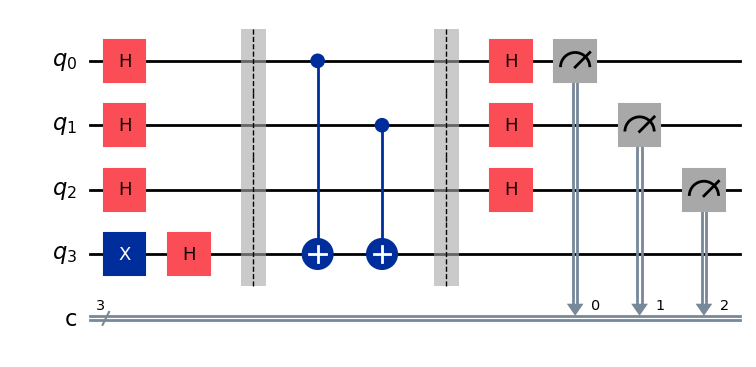

In [37]:
n = 3
qc = deutsch_jozsa(n)

qc.draw('mpl')

## Testing on Quantum Computer

In [1]:
# ## Execution
from qiskit_aer.primitives import Estimator  # Import Estimator for executing circuits

# Estimator runs quantum circuits against defined observables to compute expectation values
estimator = Estimator()
job = estimator.run([qc] * len(observables), observables)  # Executes the circuit multiple times with different observables

NameError: name 'qc' is not defined

In [ ]:
# Retrieve execution results
result = job.result()
print("Measurement Results:", result)

In [ ]:
job.result().values